# Analyzing Bank Stock Prices During the Financial Crisis

### Overview
In this project, we analyzed the stock prices of major banks during the financial crisis period from 2006 to 2016. The data for this analysis was sourced from the Quandl API, specifically from the WIKI dataset which provides historical stock prices.

### Problem Statement
We aim to understand how the stock prices of major banks were affected during the financial crisis and identify any significant trends or patterns. The banks included in this analysis are Bank of America (BAC), Citigroup (C), Goldman Sachs (GS), JPMorgan Chase (JPM), Morgan Stanley (MS), and Wells Fargo (WFC).

### Methodology
We used time series analysis techniques to examine the stock price data over the specified period. This included downloading the data, preprocessing it, and visualizing it to identify trends and anomalies. We employed Python libraries such as Pandas for data manipulation and Matplotlib for data visualization.

## Analysis

### Importing Libraries and Fetching Data

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
import quandl as ql

In [3]:
# Bank of America Corporation (BAC)
BAC = ql.get("WIKI/BAC", start_date="2006-01-01", end_date="2016-01-01")

# Citigroup Inc. (C)
C = ql.get("WIKI/C", start_date="2006-01-01", end_date="2016-01-01")

# The Goldman Sachs Group, Inc. (GS)
GS = ql.get("WIKI/GS", start_date="2006-01-01", end_date="2016-01-01")

# JPMorgan Chase & Co. (JPM)
JPM = ql.get("WIKI/JPM", start_date="2006-01-01", end_date="2016-01-01")

# Morgan Stanley (MS)
MS = ql.get("WIKI/MS", start_date="2006-01-01", end_date="2016-01-01")

# Wells Fargo & Company (WFC)
WFC = ql.get("WIKI/WFC", start_date="2006-01-01", end_date="2016-01-01")

In [4]:
WFC.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-01-03,63.20,63.95,62.39,63.80,5508200.0,0.0,1.0,22.799832,23.070400,22.507619,23.016287,11016400.0
2006-01-04,63.60,63.64,62.73,63.06,5435000.0,0.0,1.0,22.944135,22.958566,22.630277,22.749327,10870000.0
2006-01-05,63.00,63.11,62.62,62.99,5079000.0,0.0,1.0,22.727681,22.767364,22.590594,22.724074,10158000.0
2006-01-06,63.16,63.55,62.77,63.36,4201900.0,0.0,1.0,22.785402,22.926097,22.644707,22.857554,8403800.0
2006-01-09,63.35,63.65,63.11,63.35,2809800.0,0.0,1.0,22.853946,22.962173,22.767364,22.853946,5619600.0


In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers.sort()
print(tickers)

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks

BAC                                                           \
             Open   High    Low  Close      Volume Ex-Dividend Split Ratio   
Date                                                                         
2006-01-03  46.92  47.18  46.15  47.08  16296700.0         0.0         1.0   
2006-01-04  47.00  47.24  46.45  46.58  17757900.0         0.0         1.0   
2006-01-05  46.58  46.83  46.32  46.64  14970700.0         0.0         1.0   
2006-01-06  46.80  46.91  46.35  46.57  12599800.0         0.0         1.0   
2006-01-09  46.72  46.97  46.36  46.60  15619400.0         0.0         1.0   
...           ...    ...    ...    ...         ...         ...         ...   
2015-12-24  17.32  17.38  17.22  17.27  29373415.0         0.0         1.0   
2015-12-28  17.22  17.23  16.98  17.13  41759993.0         0.0         1.0   
2015-12-29  17.25  17.35  17.16  17.28  45628449.0         0.0         1.0   
2015-12-30  17.20  17.24  17.04  17.05  35035518.0         0.0         1.0   
2015-12-31  17.01  17.07  16.83  16.83  47106760.0         0.0         1.0   

                                             ...     WFC                     \
            Adj. Open  Adj. High   Adj. Low  ...     Low  Close      Volume   
Date                                         ...                              
2006-01-03  37.126108  37.331837  36.516835  ...  62.390  63.80   5508200.0   
2006-01-04  37.189409  37.379312  36.754214  ...  62.730  63.06   5435000.0   
2006-01-05  36.857078  37.054894  36.651349  ...  62.620  62.99   5079000.0   
2006-01-06  37.031156  37.118195  36.675087  ...  62.770  63.36   4201900.0   
2006-01-09  36.967855  37.165671  36.683000  ...  63.110  63.35   2809800.0   
...               ...        ...        ...  ...     ...    ...         ...   
2015-12-24  16.866133  16.924561  16.768753  ...  54.710  54.82   4999417.0   
2015-12-28  16.768753  16.778491  16.535042  ...  54.170  54.68   8288759.0   
2015-12-29  16.797967  16.895347  16.710326  ...  54.990  55.29   7894876.0   
2015-12-30  16.749277  16.788229  16.593470  ...  54.794  54.89   8016893.0   
2015-12-31  16.564256  16.622684  16.388973  ...  54.220  54.36  10929420.0   

                                                                     \
           Ex-Dividend Split Ratio  Adj. Open  Adj. High   Adj. Low   
Date                                                                  
2006-01-03         0.0         1.0  22.799832  23.070400  22.507619   
2006-01-04         0.0         1.0  22.944135  22.958566  22.630277   
2006-01-05         0.0         1.0  22.727681  22.767364  22.590594   
2006-01-06         0.0         1.0  22.785402  22.926097  22.644707   
2006-01-09         0.0         1.0  22.853946  22.962173  22.767364   
...                ...         ...        ...        ...        ...   
2015-12-24         0.0         1.0  51.783856  51.896900  51.538926   
2015-12-28         0.0         1.0  51.388199  51.604868  51.030225   
2015-12-29         0.0         1.0  51.915741  52.141830  51.802696   
2015-12-30         0.0         1.0  52.066467  52.104149  51.618057   
2015-12-31         0.0         1.0  51.350518  51.764921  51.077327   

                                   
           Adj. Close Adj. Volume  
Date                               
2006-01-03  23.016287  11016400.0  
2006-01-04  22.749327  10870000.0  
2006-01-05  22.724074  10158000.0  
2006-01-06  22.857554   8403800.0  
2006-01-09  22.853946   5619600.0  
...               ...         ...  
2015-12-24  51.642550   4999417.0  
2015-12-28  51.510664   8288759.0  
2015-12-29  52.085308   7894876.0  
2015-12-30  51.708493   8016893.0  
2015-12-31  51.209212  10929420.0  

[2517 rows x 72 columns]

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

## Data Exploration

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                                           \
Stock Info    Open   High    Low  Close      Volume Ex-Dividend Split Ratio   
Date                                                                          
2006-01-03   46.92  47.18  46.15  47.08  16296700.0         0.0         1.0   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0         0.0         1.0   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0         0.0         1.0   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0         0.0         1.0   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0         0.0         1.0   

Bank Ticker                                   ...    WFC                    \
Stock Info   Adj. Open  Adj. High   Adj. Low  ...    Low  Close     Volume   
Date                                          ...                            
2006-01-03   37.126108  37.331837  36.516835  ...  62.39  63.80  5508200.0   
2006-01-04   37.189409  37.379312  36.754214  ...  62.73  63.06  5435000.0   
2006-01-05   36.857078  37.054894  36.651349  ...  62.62  62.99  5079000.0   
2006-01-06   37.031156  37.118195  36.675087  ...  62.77  63.36  4201900.0   
2006-01-09   36.967855  37.165671  36.683000  ...  63.11  63.35  2809800.0   

Bank Ticker                                                           \
Stock Info  Ex-Dividend Split Ratio  Adj. Open  Adj. High   Adj. Low   
Date                                                                   
2006-01-03          0.0         1.0  22.799832  23.070400  22.507619   
2006-01-04          0.0         1.0  22.944135  22.958566  22.630277   
2006-01-05          0.0         1.0  22.727681  22.767364  22.590594   
2006-01-06          0.0         1.0  22.785402  22.926097  22.644707   
2006-01-09          0.0         1.0  22.853946  22.962173  22.767364   

Bank Ticker                         
Stock Info  Adj. Close Adj. Volume  
Date                                
2006-01-03   23.016287  11016400.0  
2006-01-04   22.749327  10870000.0  
2006-01-05   22.724074  10158000.0  
2006-01-06   22.857554   8403800.0  
2006-01-09   22.853946   5619600.0  

[5 rows x 72 columns]

### Calculating Maximum Closing Prices

We start by extracting the closing prices for each bank stock and calculating the maximum closing price for each. This step helps us identify the peak values of the stocks during the period under study.

In [7]:
close_prices = bank_stocks.xs(key='Close', level='Stock Info', axis=1)
max_close_prices = close_prices.max()
max_close_prices

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

In [8]:
returns = pd.DataFrame()

In [9]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


## Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

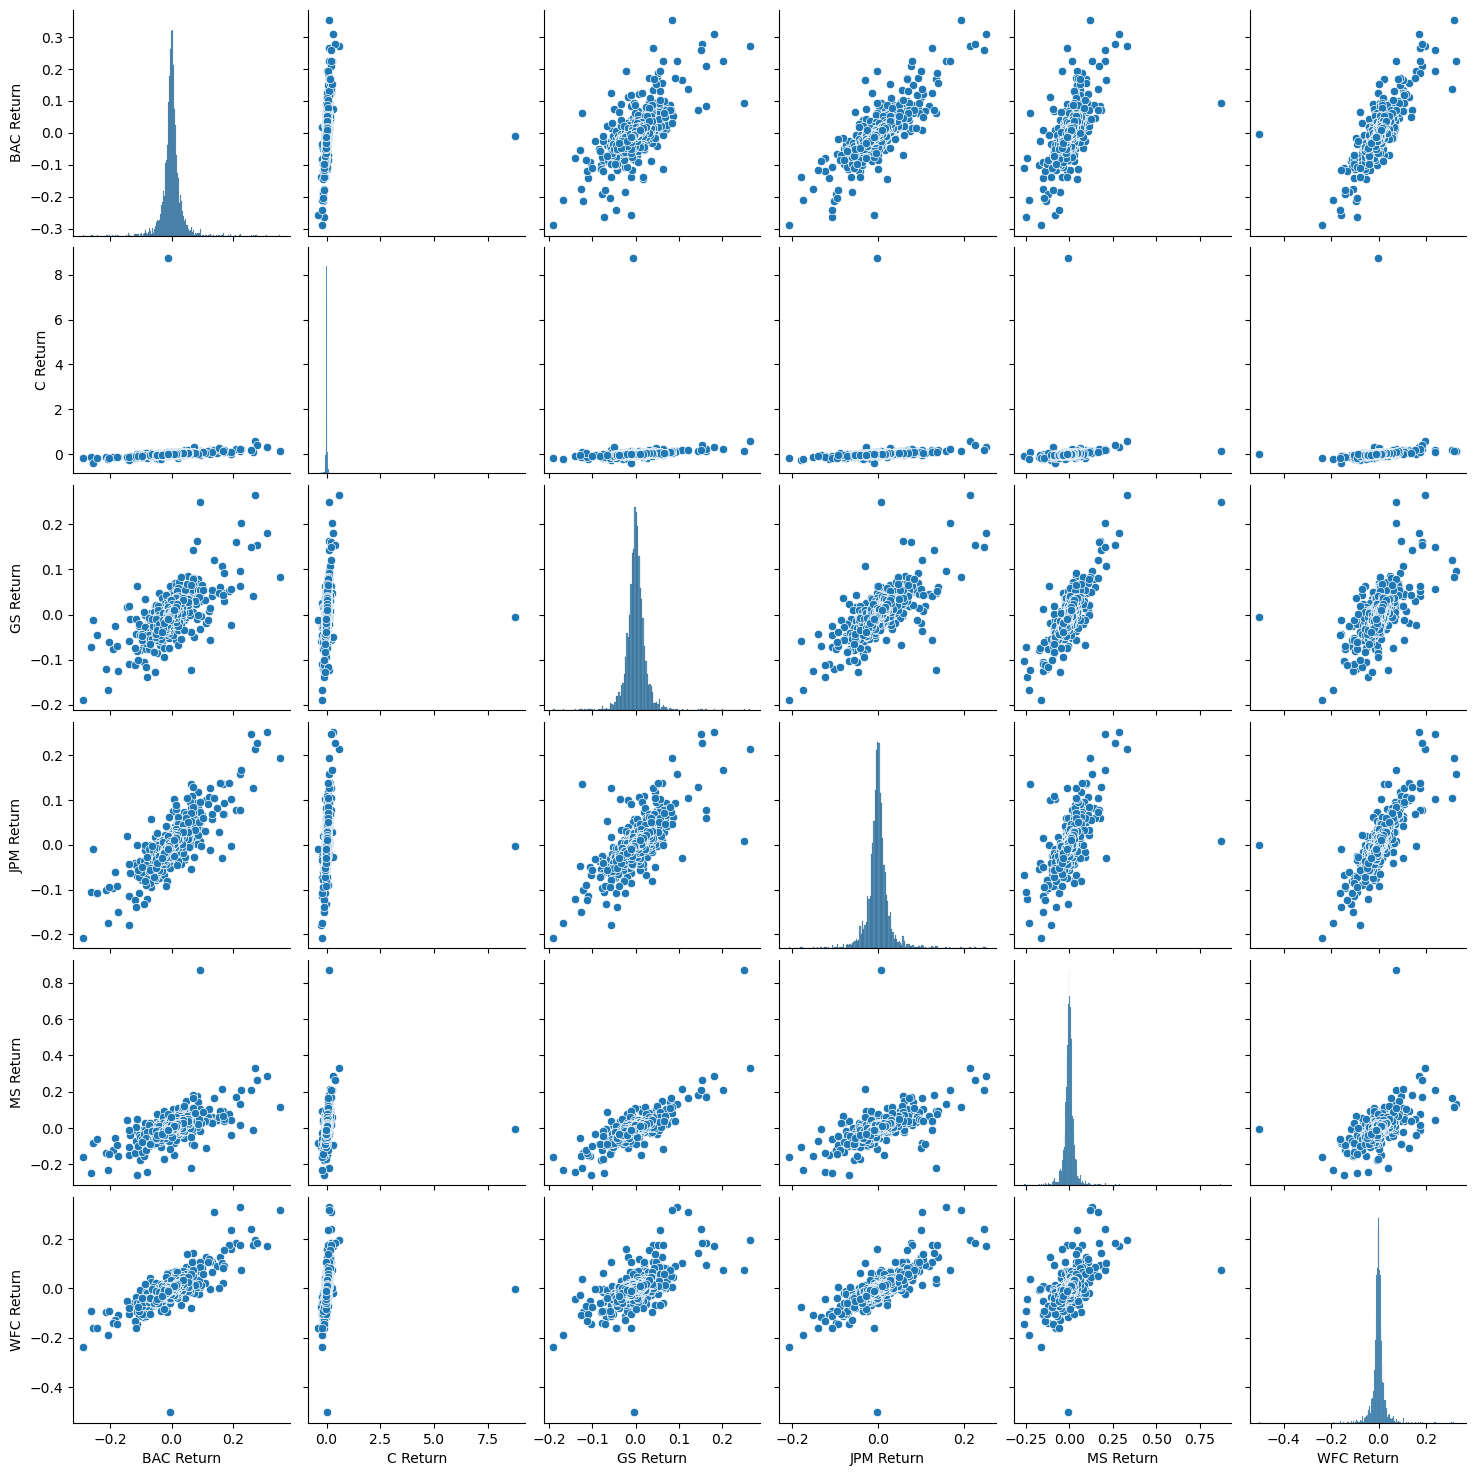

In [11]:
sns.pairplot(returns[1:])

In the pair plot, Citigroup (C) stands out due to its unusual distribution and scatter patterns compared to other banks. The histograms for Citigroup show a distribution with more extreme values, indicating higher volatility. Additionally, the scatter plots involving Citigroup often show less correlation with other banks' returns.

This behavior could be due to Citigroup's unique exposure to subprime mortgages and other high-risk assets, which were heavily impacted during the financial crisis. The significant losses and subsequent government bailout of Citigroup might explain the distinctive patterns in its stock returns compared to other banks in the analysis.

### Bank stock worst single-day returns

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

We notice that Bank of America, Goldman Sachs, and JPMorgan Chase all experienced their worst returns on January 20, 2009. This simultaneous drop suggests a significant market-wide event impacting these banks. January 20, 2009, coincides with the period of extreme market turmoil following the collapse of Lehman Brothers in late 2008, which led to severe stress in the financial sector.

Additionally, Citigroup's largest drop on February 27, 2009, is close to its largest gain, indicating extreme volatility. During this period, Citigroup was undergoing substantial restructuring and received significant government bailout support, leading to rapid fluctuations in its stock price. This highlights the heightened uncertainty and market reactions to news related to Citigroup's stability and recovery efforts.

### Bank stock best single-day returns

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### Standard deviation of the returns

The standard deviation measures the volatility of the stock returns, indicating how much the returns deviate from the average. 

In [14]:
returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037820
WFC Return    0.031838
dtype: float64

Citigroup (C) has the highest standard deviation at 0.179068, making it the riskiest stock over the entire period. This high volatility reflects Citigroup's significant exposure to the financial crisis and its substantial fluctuations in stock price.

In [15]:
returns[returns.index.year == 2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In 2015, Morgan Stanley (MS) has the highest standard deviation at 0.016249, indicating it was the riskiest stock among the ones analyzed during that year. This suggests that Morgan Stanley experienced more significant fluctuations in its stock price in 2015 compared to the other banks.

In [16]:
ms_2015_return = returns[returns.index.year == 2015]['MS Return']

<Axes: xlabel='MS Return', ylabel='Count'>

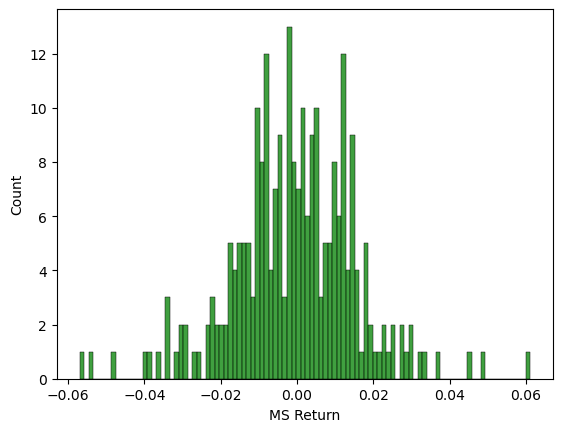

In [17]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=100)

This analysis confirms that Morgan Stanley experienced significant fluctuations in 2015, as indicated by the standard deviation we calculated earlier. By visualizing the returns, we can see the spread and shape of the distribution, providing a clearer picture of the stock's performance and risk during that year.

<Axes: xlabel='C Return', ylabel='Count'>

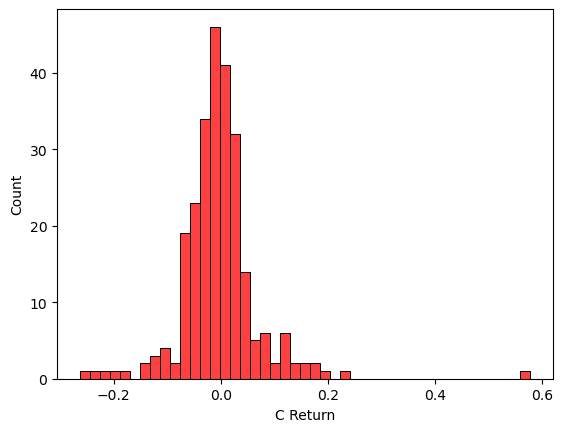

In [18]:
sns.histplot(returns.loc['2008']['C Return'], color='red')

This plot highlights several extreme negative returns, reflecting the severe impact of the financial crisis on Citigroup's stock price. It confirms that Citigroup experienced substantial fluctuations in 2008, with a wide range of returns and several extreme values. 

### Closing prices of major bank stocks from 2006 to 2016

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [66]:
bank_stocks.head()

Bank Ticker    BAC                                                           \
Stock Info    Open   High    Low  Close      Volume Ex-Dividend Split Ratio   
Date                                                                          
2006-01-03   46.92  47.18  46.15  47.08  16296700.0         0.0         1.0   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0         0.0         1.0   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0         0.0         1.0   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0         0.0         1.0   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0         0.0         1.0   

Bank Ticker                                   ...    WFC                    \
Stock Info   Adj. Open  Adj. High   Adj. Low  ...    Low  Close     Volume   
Date                                          ...                            
2006-01-03   37.126108  37.331837  36.516835  ...  62.39  63.80  5508200.0   
2006-01-04   37.189409  37.379312  36.754214  ...  62.73  63.06  5435000.0   
2006-01-05   36.857078  37.054894  36.651349  ...  62.62  62.99  5079000.0   
2006-01-06   37.031156  37.118195  36.675087  ...  62.77  63.36  4201900.0   
2006-01-09   36.967855  37.165671  36.683000  ...  63.11  63.35  2809800.0   

Bank Ticker                                                           \
Stock Info  Ex-Dividend Split Ratio  Adj. Open  Adj. High   Adj. Low   
Date                                                                   
2006-01-03          0.0         1.0  22.799832  23.070400  22.507619   
2006-01-04          0.0         1.0  22.944135  22.958566  22.630277   
2006-01-05          0.0         1.0  22.727681  22.767364  22.590594   
2006-01-06          0.0         1.0  22.785402  22.926097  22.644707   
2006-01-09          0.0         1.0  22.853946  22.962173  22.767364   

Bank Ticker                         
Stock Info  Adj. Close Adj. Volume  
Date                                
2006-01-03   23.016287  11016400.0  
2006-01-04   22.749327  10870000.0  
2006-01-05   22.724074  10158000.0  
2006-01-06   22.857554   8403800.0  
2006-01-09   22.853946   5619600.0  

[5 rows x 72 columns]

<Axes: xlabel='Date'>

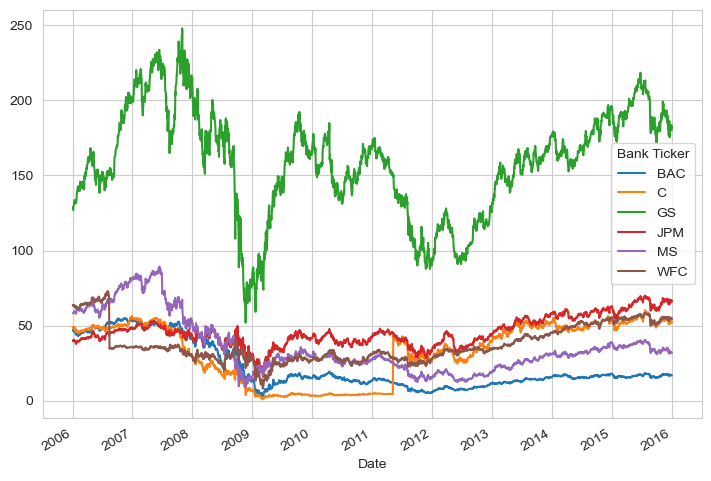

In [20]:
# df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

close = bank_stocks.xs(key='Close', level='Stock Info', axis=1)
close.plot.line(figsize=(8.5, 6))

This visualization highlights several key points:

- The significant drop in stock prices around 2008-2009, corresponding to the financial crisis.
- The varying recovery rates of different banks. For instance, Goldman Sachs (GS) shows a strong recovery, reaching higher levels compared to others.
- Citigroup (C) experienced the most significant drop and a slower recovery, reflecting its substantial exposure to high-risk assets and the impact of the crisis.

### Plotting Moving Averages for Bank of America's Stock in 2008

We analyzed the moving averages for Bank of America's stock in the year 2008 to understand the stock's trend over that period. Moving averages help smooth out short-term fluctuations and highlight longer-term trends or cycles.

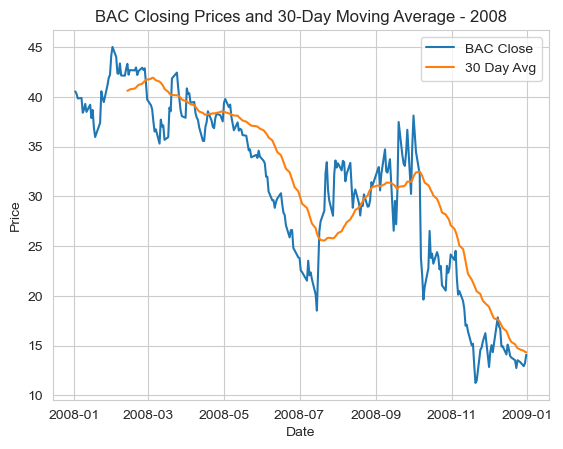

In [28]:
bac_2008 = bank_stocks.loc['2008', ('BAC', 'Close')]

# Calculate the rolling 30-day average of the closing prices
rolling_30 = bac_2008.rolling(window=30).mean()

# Plot the actual closing prices
plt.plot(bac_2008.index, bac_2008, label='BAC Close')

# Plot the rolling average
plt.plot(rolling_30.index, rolling_30, label='30 Day Avg')

# Add labels and legend
plt.title('BAC Closing Prices and 30-Day Moving Average - 2008')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

From the plot, we can observe a consistent downward trend throughout the year, reflecting the impact of the financial crisis on Bank of America's stock. The 30-day moving average helps us see this downward trend more clearly by reducing the noise from daily price movements.

### Heatmap of Stock Price Correlations

We created a heatmap to visualize the correlations between the closing prices of different bank stocks. This helps us understand how the stock prices of these banks move in relation to each other.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

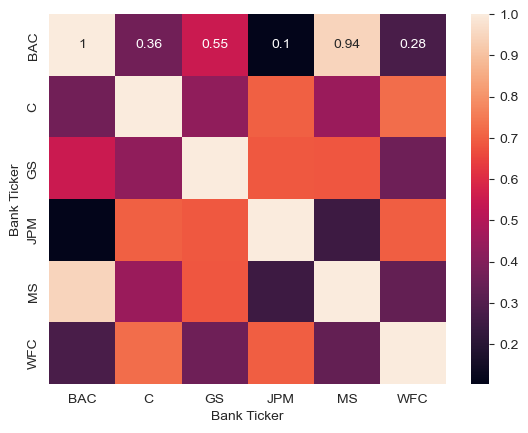

In [33]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

From the heatmap, we observe that:

- JPMorgan Chase (JPM) and Bank of America (BAC) have a very high correlation (0.94), indicating that their stock prices move very similarly.
- Citigroup (C) and Goldman Sachs (GS) have a moderate correlation (0.55), suggesting some degree of similarity in their price movements.
- Morgan Stanley (MS) shows lower correlations with most other banks, indicating more independent price movements.

We can also group the stocks based on their correlation coefficients, highlighting clusters of stocks that have similar price movements.

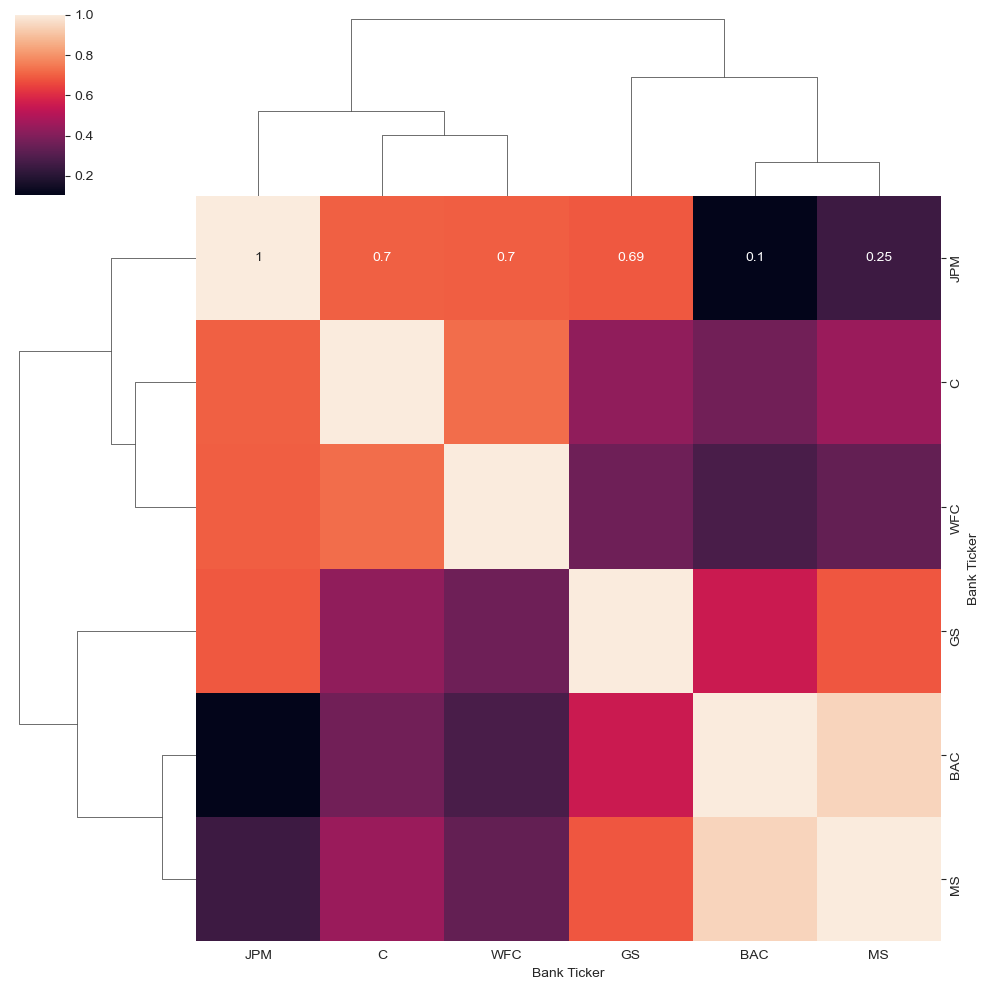

In [35]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Results

We analyzed major bank stocks from 2006 to 2016 to understand the impact of the financial crisis. Citigroup showed the most significant drop and volatility. In 2015, Morgan Stanley was the riskiest. Distribution plots for Morgan Stanley in 2015 and Citigroup in 2008 highlighted high volatility.

Our heatmap and cluster map revealed strong correlations between some banks, like JPMorgan Chase and Bank of America, indicating similar price movements. Goldman Sachs and Morgan Stanley were more independent. The moving average analysis for Bank of America in 2008 showed a clear downward trend.